# **00. Linear Regression Example**

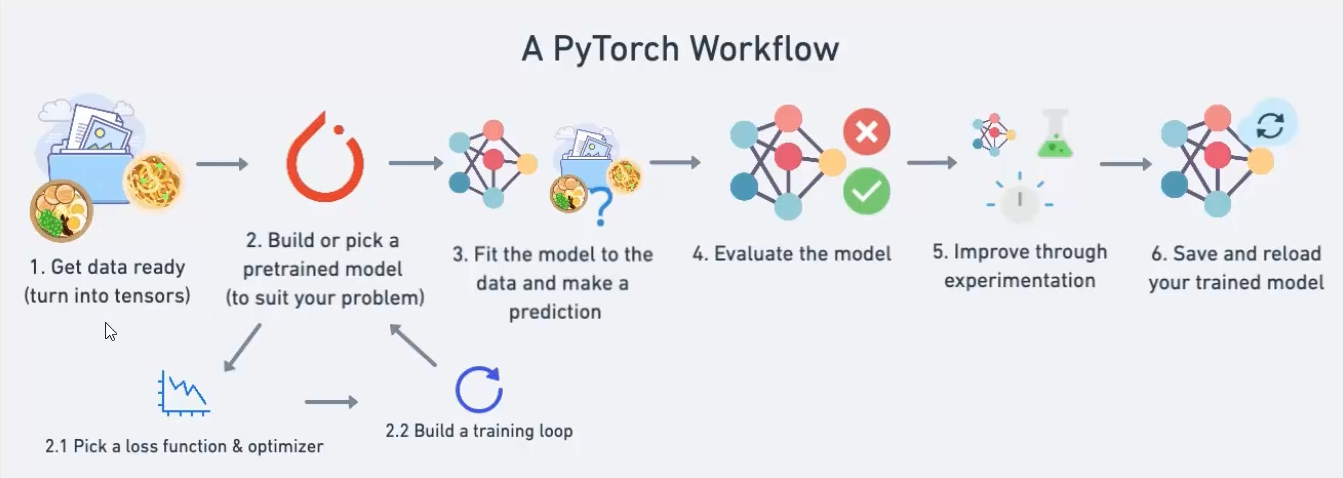

*For now, we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on.*

Specifically, we're going to cover:

| Topic                                                      | Contents                                                                                              |
|------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **1. Getting data ready**                                  | Data can be almost anything but to get started we're going to create a simple straight line           |
| **2. Building a model**                                    | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function, optimizer** and build a **training loop**. |
| **3. Fitting the model to data (training)**                | We've got data and a model, now let's let the model (try to) find patterns in the **(training)** data.|
| **4. Making predictions and evaluating a model (inference)** | **Our model's found patterns in the data, let's compare its findings to the actual (testing) data.**   |
| **5. Saving and loading a model**                          | You may want to use your model elsewhere, or come back to it later, here we'll cover that.            |

The [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

And now let's import what we'll need for this module.

We're going to get `torch`, `torch.nn` (`nn` stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

# **Loading Library**

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.6.0+cu124


# **01. Data Preparing & Loading**

I want to stress that "data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.


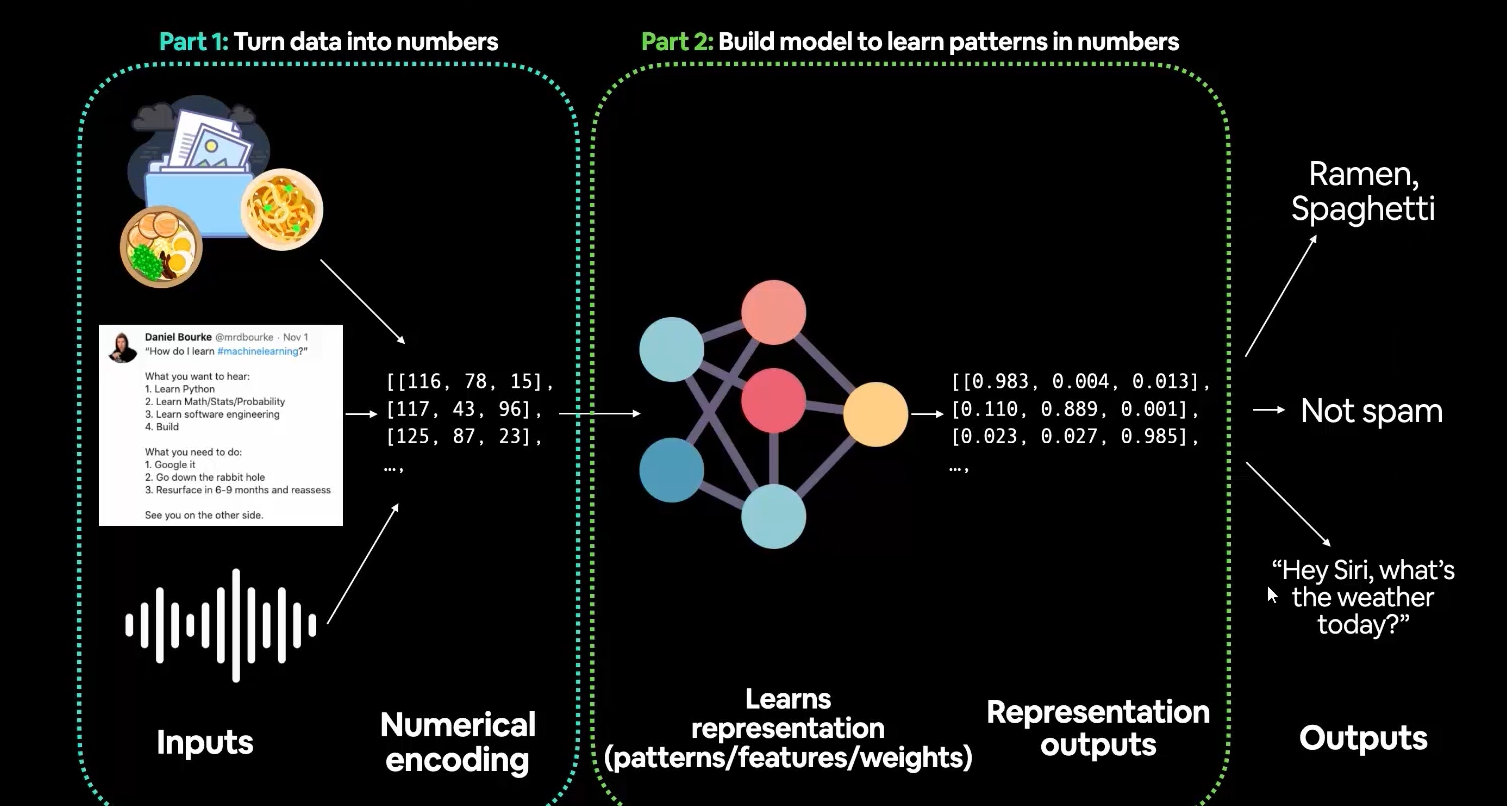



## Understanding Machine Learning: A Simple Example

Machine learning involves two primary steps:
1. **Data Representation**: Convert all your data into a numerical format.
2. **Model Selection and Training**: Choose or develop a model that can learn from this data effectively.

In some cases, these two steps can occur simultaneously.

**What Happens When There's No Data?**

**Imagine a simple scenario where our data fits a straight line.**

### Practical Example: Linear Regression

We will:
- Generate synthetic data that aligns with a known straight line equation.
- **Use Linear Regression** in PyTorch to estimate the parameters of this line.
- **Apply Gradient Descent** to optimize our model's predictions.

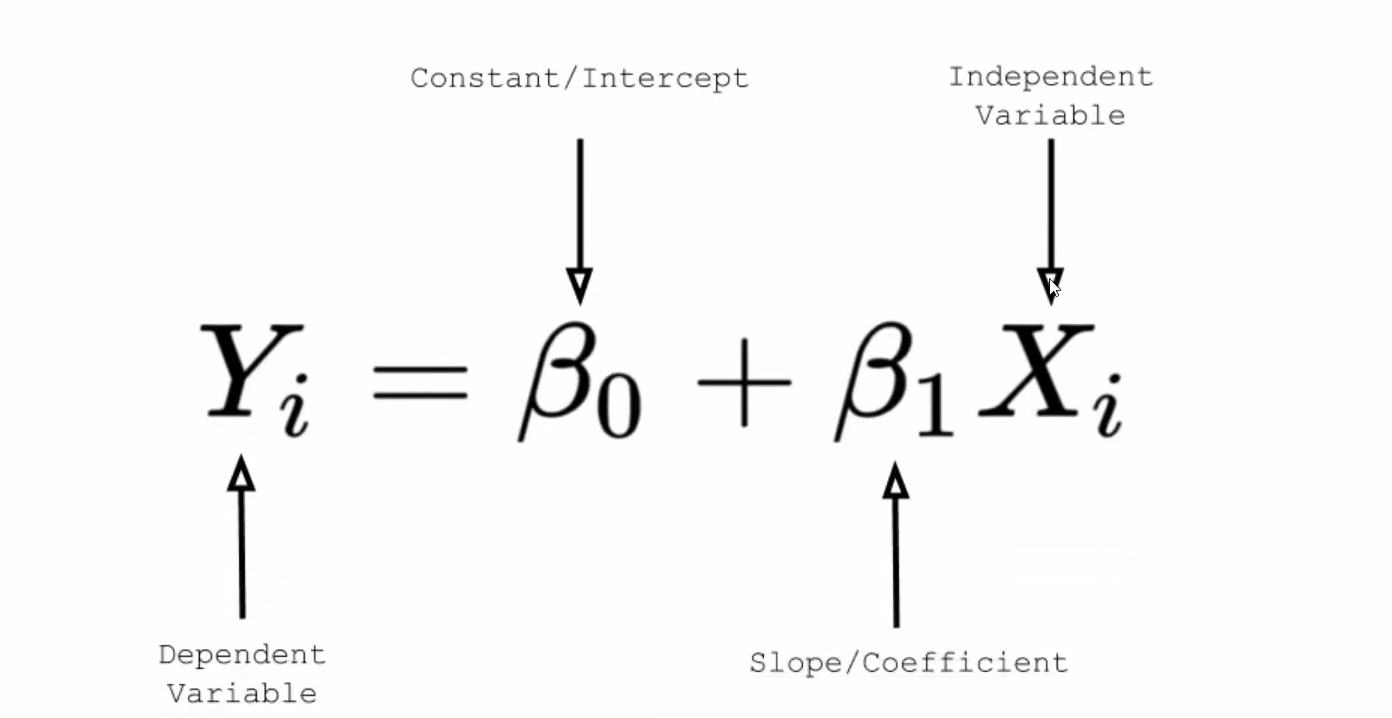

## Concept Introduction

Imagine we're scientists trying to understand the relationship between two variables. In this case, we've created a simple scenario where we have a direct relationship between these variables:

- **X (independent variable)**: This might represent something we can measure directly, like time spent studying.
- **y (dependent variable)**: This represents the outcome based on X, such as test scores.

We've defined a simple linear relationship: `y = weight * X + bias`, where `weight` is 0.7 and `bias` is 0.3. This equation tells us how y changes with X.

## Data Creation and Structure

### Generating Data:

- We created a series of values for X ranging from 0 to just below 1, increasing by 0.02 each time. This gives us a smooth range of values to work with.
- We then calculate the corresponding y values using our known weight and bias, simulating a perfect linear relationship without any random noise.

In [7]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Beautiful! Now we're going to move towards building a model that can learn the relationship between x (**features**) and y (**labels**).

## Split data into training and test sets

Each split of the dataset serves a specific purpose:

| Split            | Purpose                                                                                  | Amount of total data | How often is it used?       |
|------------------|------------------------------------------------------------------------------------------|---------------------|-----------------------------|
| **Training set** | The model learns from this data (like the course materials you study during the semester).| ~60-80%             | Always                      |
| **Validation set**| The model gets tuned on this data (like the practice exam you take before the final exam).| ~10-20%             | Often but not always        |
| **Testing set**  | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20%  | Always                      |

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

## Training and Testing Split:

- To evaluate how well our model can predict new data, we split our dataset into training and testing sets.
- **80% of the data is used for training**: This is where our model will learn the relationship between X and y.
- **20% of the data is reserved for testing**: This is used to test how well our model predicts new, unseen data.

In [8]:
# Create train/test split
train_split = int(0.8 * len(X))  # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

We've got 40 samples for training (`x_train` & `y_train`) and 10 samples for testing (`x_test` & `y_test`).

The model we create is going to try and learn the relationship between `x_train` & `y_train` and then we will evaluate what it learns on `x_test` and `y_test`.

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    This function plots the training data, testing data, and (if available) the predictions on a scatter plot.

    Parameters:
        train_data (array-like): The features of the training dataset.
        train_labels (array-like): The labels or targets associated with the training data.
        test_data (array-like): The features of the testing dataset.
        test_labels (array-like): The labels or targets associated with the test data.
        predictions (array-like, optional): The predicted values for the test data. Defaults to None.

    Note:
        - The function uses different colors for each dataset for clear visualization:
            - Blue for training data
            - Green for testing data
            - Red for predictions (if provided)
        - Ensure that matplotlib.pyplot is imported as plt before using this function.
    """

    # Set up the plot dimensions and title
    plt.figure(figsize=(10, 7))
    plt.title("Comparison of Training Data, Testing Data, and Predictions")

    # Plot training data in blue with a smaller marker size for better visualization
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green with a smaller marker size to differentiate from training data
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # If predictions are provided, plot them on the test data in red to compare against actual test labels
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Add a legend with a suitable font size for clarity
    plt.legend(prop={"size": 14})

    # Display the plot
    plt.show()

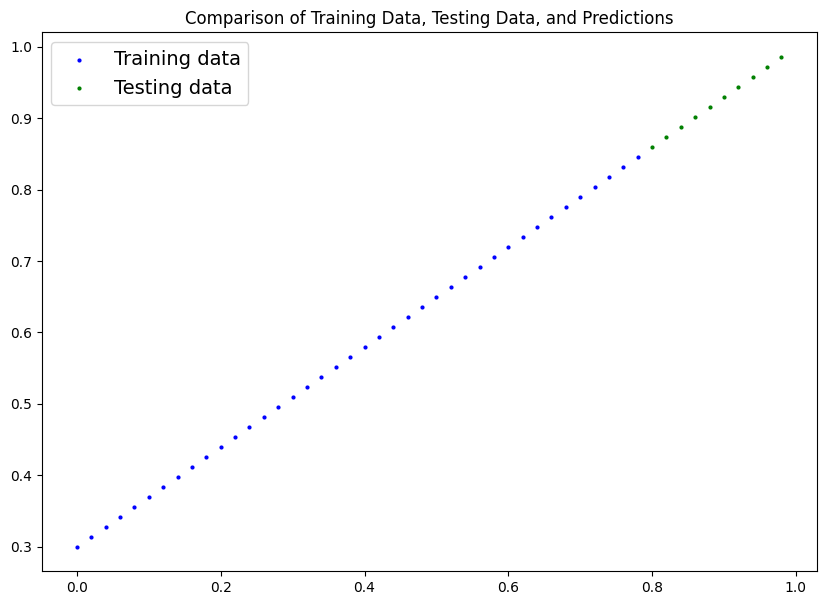

In [10]:
plot_predictions()

# **Thanks! Don't forget to Star the repo 🫡⭐**